In [1]:
! pip install datasets transformers seqeval
! pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.8 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=afa2bbe8de537a288b3a49eb2fc10cf628eee291cf3439f0ec573f10b46ff4ea
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency r

In [2]:
from datasets import get_dataset_config_names, load_dataset
import pandas as pd

In [3]:
xtreme_subsets = get_dataset_config_names('xtreme')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/131k [00:00<?, ?B/s]

In [4]:
len(xtreme_subsets)

183

In [9]:
pan_subset = [s for s in xtreme_subsets if s.startswith("PAN")]

In [10]:
pan_subset

['PAN-X.af',
 'PAN-X.ar',
 'PAN-X.bg',
 'PAN-X.bn',
 'PAN-X.de',
 'PAN-X.el',
 'PAN-X.en',
 'PAN-X.es',
 'PAN-X.et',
 'PAN-X.eu',
 'PAN-X.fa',
 'PAN-X.fi',
 'PAN-X.fr',
 'PAN-X.he',
 'PAN-X.hi',
 'PAN-X.hu',
 'PAN-X.id',
 'PAN-X.it',
 'PAN-X.ja',
 'PAN-X.jv',
 'PAN-X.ka',
 'PAN-X.kk',
 'PAN-X.ko',
 'PAN-X.ml',
 'PAN-X.mr',
 'PAN-X.ms',
 'PAN-X.my',
 'PAN-X.nl',
 'PAN-X.pt',
 'PAN-X.ru',
 'PAN-X.sw',
 'PAN-X.ta',
 'PAN-X.te',
 'PAN-X.th',
 'PAN-X.tl',
 'PAN-X.tr',
 'PAN-X.ur',
 'PAN-X.vi',
 'PAN-X.yo',
 'PAN-X.zh']

In [11]:
pan_subset[:5]

['PAN-X.af', 'PAN-X.ar', 'PAN-X.bg', 'PAN-X.bn', 'PAN-X.de']

In [12]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cuda')

In [85]:
from collections import defaultdict
from datasets import DatasetDict

langs = ['ta', 'hi', 'ur', 'ml']
fracs = [0.629, 0.229, 0.084, 0.059]

panx_ch = defaultdict(DatasetDict)

for lang, frac in zip(langs, fracs):
    ds = load_dataset("xtreme", name=f"PAN-X.{lang}")

    for split in ds:
        panx_ch[lang][split] = (ds[split].shuffle(seed=0).select(range(int(frac * ds[split].num_rows))))

train-00000-of-00001.parquet:   0%|          | 0.00/553k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/28.5k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/29.0k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/709k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/74.4k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/69.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [86]:
pd.DataFrame({lang : panx_ch[lang]["train"].num_rows for lang in langs}, index = ["Number of Training Examples"])

ta    hi    ur   ml
Number of Training Examples  9435  1145  1680  590

In [15]:
element = panx_ch["ta"]["train"][0]
for key, value in element.items():
    print(f"{key} {value}")

tokens ['வழிமாற்று', 'பெண்கள்', 'இடஒதுக்கீடு', 'வரைவுச்', 'சட்டம்']
ner_tags [0, 3, 4, 4, 4]
langs ['ta', 'ta', 'ta', 'ta', 'ta']


In [16]:
for key, value in panx_ch["ta"]["train"].features.items():
    print(f"{key} {value}")

tokens Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None)
langs Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


In [18]:
tags = panx_ch["ta"]["train"].features["ner_tags"].feature
print(tags)

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)


In [19]:
def create_tag_names(batch, tags):
    return {"ner_tags_str": [tags.int2str(idx) for idx in batch["ner_tags"]]}

panx_de = panx_ch["ta"].map(lambda x : create_tag_names(x, tags))

Map:   0%|          | 0/9435 [00:00<?, ? examples/s]

Map:   0%|          | 0/629 [00:00<?, ? examples/s]

Map:   0%|          | 0/629 [00:00<?, ? examples/s]

In [20]:
de_example = panx_de["train"][0]

pd.DataFrame([de_example["tokens"], de_example["ner_tags_str"]], ["Tokens", "Tags"])

0        1            2        3       4
Tokens  வழிமாற்று  பெண்கள்  இடஒதுக்கீடு  வரைவுச்  சட்டம்
Tags            O    B-ORG        I-ORG    I-ORG   I-ORG

In [21]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel



The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [22]:
class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    config_class = XLMRobertaConfig

    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        self.roberta = RobertaModel(config, add_pooling_layer=False)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
        self.init_weights()

    def forward(self, input_ids = None, attention_mask = None, token_type_ids = None, num_items_in_batch= None, labels = None, **kwargs):
        outputs = self.roberta(input_ids, attention_mask = attention_mask, token_type_ids = token_type_ids, **kwargs)
        sequence_output = self.dropout(outputs[0])
        logits = self.classifier(sequence_output)
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
        return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states, attentions=outputs.attentions)



In [23]:
index2tag = {idx : tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}



In [24]:
from transformers import AutoConfig

xlmr_model_name = "xlm-roberta-base"
xlmr_config = AutoConfig.from_pretrained(xlmr_model_name, num_labels = tags.num_classes,
                                         id2label = index2tag, label2id=tag2index)


config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

In [25]:
import torch


xlmr_model = (XLMRobertaForTokenClassification.from_pretrained(xlmr_model_name, config=xlmr_config).to(device))

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
def tag_text(text, tags, model, tokenizer):

    tokens = tokenizer(text).tokens()

    input_ids = tokenizer(text, return_tensors = "pt").input_ids.to(device)

    outputs = model(input_ids)[0]

    predictions = torch.argmax(outputs, axis = -1)

    preds = [tags.names[p] for p in predictions[0].cpu().numpy()]

    return pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])

In [27]:
from transformers import AutoTokenizer

xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [28]:
text = "அருண் இந்தியன் ஓயில்கார்ப்பரேஷனில் வேலை செய்கிறார்"
tag_text(text, tags, xlmr_model, xlmr_tokenizer)

0      1      2        3      4      5      6      7      8   \
Tokens    <s>   ▁அரு     ண்  ▁இந்திய     ன்     ▁ஓ   யில்   கார்    ப்ப   
Tags    I-PER  I-PER  I-PER    I-PER  I-PER  I-PER  I-PER  I-PER  I-PER   

           9      10     11     12        13     14     15  
Tokens     ரே      ஷ   னில்  ▁வேலை  ▁செய்கிற    ார்   </s>  
Tags    I-PER  I-PER  I-PER  I-PER     I-PER  I-PER  I-PER

In [29]:
words, labels = de_example["tokens"], de_example["ner_tags"]

In [30]:
tokenized_input = xlmr_tokenizer(de_example["tokens"], is_split_into_words=True)
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
pd.DataFrame([tokens], index = ["Tokens"])

0     1   2     3         4    5  6   7    8    9     10  11  12  \
Tokens  <s>  ▁வழி  மா  ற்று  ▁பெண்கள்  ▁இட  ஒ  து  க்க  ீடு  ▁வரை  வு  ச்   

             13    14  
Tokens  ▁சட்டம்  </s>

In [31]:
word_ids = tokenized_input.word_ids()
pd.DataFrame([tokens, word_ids], index = ["Tokens", "Word IDs"])

0     1   2     3         4    5  6   7    8    9     10  11  12  \
Tokens     <s>  ▁வழி  மா  ற்று  ▁பெண்கள்  ▁இட  ஒ  து  க்க  ீடு  ▁வரை  வு  ச்   
Word IDs  None     0   0     0         1    2  2   2    2    2     3   3   3   

               13    14  
Tokens    ▁சட்டம்  </s>  
Word IDs        4  None

In [32]:
previous_word_idx = None
label_ids = []

for word_idx in word_ids:
    if word_idx is None or word_idx == previous_word_idx:
        label_ids.append(-100)
    elif word_idx != previous_word_idx:
        label_ids.append(labels[word_idx])
    previous_word_idx = word_idx

labels = [index2tag[l] if l != -100 else "IGN" for l in label_ids]
index = ["Tokens", "Word IDs", "Label IDs", "Labels"]

pd.DataFrame([tokens, word_ids, label_ids, labels], index = index)

0     1     2     3         4      5     6     7     8     9   \
Tokens      <s>  ▁வழி    மா  ற்று  ▁பெண்கள்    ▁இட     ஒ    து   க்க   ீடு   
Word IDs   None     0     0     0         1      2     2     2     2     2   
Label IDs  -100     0  -100  -100         3      4  -100  -100  -100  -100   
Labels      IGN     O   IGN   IGN     B-ORG  I-ORG   IGN   IGN   IGN   IGN   

              10    11    12       13    14  
Tokens      ▁வரை    வு    ச்  ▁சட்டம்  </s>  
Word IDs       3     3     3        4  None  
Label IDs      4  -100  -100        4  -100  
Labels     I-ORG   IGN   IGN    I-ORG   IGN

In [33]:
def tokenize_and_align_labels(examples, xlmr_tokenizer):
    tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True,
                                      is_split_into_words=True)
    labels = []
    for idx, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=idx)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                label_ids.append(-100)
            else:
                label_ids.append(label[word_idx])
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

def encode_panx_dataset(corpus, xlmr_tokenizer):
    return corpus.map(
        lambda x: tokenize_and_align_labels(x, xlmr_tokenizer),
        batched=True,
        remove_columns=['langs', 'ner_tags', 'tokens']
    )


In [42]:
panx_ta_encoded = encode_panx_dataset(panx_ch["ta"], xlmr_tokenizer)

Map:   0%|          | 0/9435 [00:00<?, ? examples/s]

In [43]:
panx_ta_encoded["train"][0]

{'input_ids': [0,
  27906,
  6161,
  35867,
  87417,
  37901,
  183177,
  2802,
  2798,
  105723,
  34155,
  7967,
  6149,
  196247,
  2],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'labels': [-100,
  0,
  -100,
  -100,
  3,
  4,
  -100,
  -100,
  -100,
  -100,
  4,
  -100,
  -100,
  4,
  -100]}

In [44]:
from seqeval.metrics import classification_report
import numpy as np

def align_predictions(predictions, label_ids):
    preds = np.argmax(predictions, axis = 2)
    batch_size, seq_len = preds.shape
    labels_list, preds_list = [], []

    for batch_idx in range(batch_size):
        example_labels, example_preds = [], []
        for seq_idx in range(seq_len):
            if label_ids[batch_idx, seq_idx] != -100:
                example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
                example_preds.append(index2tag[preds[batch_idx][seq_idx]])
        labels_list.append(example_labels)
        preds_list.append(example_preds)

    return preds_list, labels_list


In [38]:
! pip install -U accelerate

In [45]:
from transformers import TrainingArguments

num_epochs = 3
batch_size = 24

logging_steps = len(panx_ta_encoded["train"]) // batch_size
model_name = f"{xlmr_model_name}-finetuned-panx-tamil"
training_args = TrainingArguments(
    output_dir=model_name, log_level="error", num_train_epochs = num_epochs,
    per_device_train_batch_size=batch_size, per_device_eval_batch_size=batch_size,
    evaluation_strategy="epoch",
    save_steps=1e6, weight_decay=0.01, disable_tqdm=False, logging_steps=logging_steps
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [46]:
from seqeval.metrics import f1_score

def compute_metrics(eval_pred):
    y_pred, y_true = align_predictions(eval_pred.predictions, eval_pred.label_ids)
    return {"f1" : f1_score(y_true, y_pred)}

In [47]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

In [48]:
from transformers import Trainer

trainer = Trainer(model=xlmr_model, args=training_args, data_collator=data_collator, compute_metrics=compute_metrics,
                  train_dataset=panx_ta_encoded["train"],eval_dataset=panx_ta_encoded["validation"], tokenizer = xlmr_tokenizer)

<ipython-input-48-cd9a10521d20>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=xlmr_model, args=training_args, data_collator=data_collator, compute_metrics=compute_metrics,


In [49]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


TrainOutput(global_step=1182, training_loss=0.2513707867884999, metrics={'train_runtime': 425.4821, 'train_samples_per_second': 66.525, 'train_steps_per_second': 2.778, 'total_flos': 628800282287496.0, 'train_loss': 0.2513707867884999, 'epoch': 3.0})

In [50]:
trainer

In [51]:
from torch.nn.functional import cross_entropy

def forward_pass_with_labels(batch):
  features = [dict(zip(batch, t)) for t in zip(*batch.values())]

  batch = data_collator(features)
  input_ids = batch["input_ids"].to(device)
  attention_mask = batch["attention_mask"].to(device)
  labels = batch["labels"].to(device)
  with torch.no_grad():
    output = trainer.model(input_ids, attention_mask)
    predicted_label = torch.argmax(output.logits, axis = -1).cpu().numpy()

  loss = cross_entropy(output.logits.view(-1, 7), labels.view(-1), reduction = "none")
  loss = loss.view(len(input_ids), -1).cpu().numpy()

  return {"loss": loss, "predicted_label": predicted_label}


In [52]:
valid_set = panx_ta_encoded["validation"]
valid_set_pred = valid_set.map(forward_pass_with_labels, batched = True, batch_size = 32)
df = valid_set_pred.to_pandas()

Map:   0%|          | 0/629 [00:00<?, ? examples/s]

In [53]:
df.head()

input_ids  \
0  [0, 6, 187871, 111224, 4575, 6, 6016, 17553, 5...   
1  [0, 7216, 3937, 35867, 20539, 361, 7963, 2802,...   
2  [0, 27906, 6161, 35867, 42143, 5, 37255, 5, 13...   
3    [0, 242, 5106, 7963, 40983, 9313, 5106, 242, 2]   
4  [0, 12928, 7827, 20663, 13945, 27906, 3770, 70...   

                                      attention_mask  \
0      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2               [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
3                        [1, 1, 1, 1, 1, 1, 1, 1, 1]   
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                              labels  \
0  [-100, 1, -100, -100, -100, 2, -100, -100, -10...   
1  [-100, 0, -100, -100, -100, 0, 3, -100, -100, ...   
2  [-100, 0, -100, -100, 1, -100, 2, -100, 2, -10...   
3            [-100, 0, 0, 5, -100, -100, 0, 0, -100]   
4  [-100, 3, -100, -100, -100, 4, -100, -100, -10...   

                                                loss  \
0  [0.0, 0.0036092158, 0.0, 0.0, 0.0, 0.003991138...   
1  [0.0, 0.0002467328, 0.0, 0.0, 0.0, 0.001535309...   
2  [0.0, 0.00028224775, 0.0, 0.0, 0.0019426538, 0...   
3  [0.0, 0.0011607822, 0.0007962394, 0.038503557,...   
4  [0.0, 0.012848098, 0.0, 0.0, 0.0, 0.016217574,...   

                                     predicted_label  
0  [2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...  
1  [0, 0, 0, 0, 0, 0, 3, 3, 3, 4, 4, 4, 0, 0, 0, ...  
2  [1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, ...  
3  [5, 0, 0, 5, 5, 6, 0, 0, 5, 5, 5, 5, 5, 5, 5, ...  
4  [0, 3, 3, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, ...

In [54]:
index2tag[-100] = "IGN"
df["input_tokens"] = df["input_ids"].apply(lambda x : xlmr_tokenizer.convert_ids_to_tokens(x))
df["predicted_label"] = df["predicted_label"].apply(lambda x : [index2tag[i] for i in x])
df["labels"] = df["labels"].apply(lambda x : [index2tag[i] for i in x])
df['loss'] = df.apply(lambda x : x['loss'][:len(x['input_ids'])], axis = 1)
df['predicted_label'] = df.apply(lambda x : x['predicted_label'][:len(x['input_ids'])], axis = 1)

In [55]:
df_tokens = df.apply(pd.Series.explode)
df_tokens = df_tokens.query("labels != 'IGN'")
df_tokens['loss'] = df_tokens['loss'].astype(float).round(2)

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize = "true")
  fig, ax = plt.subplots(figsize = (6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
  disp.plot(cmap = plt.cm.Blues, values_format = ".2f", ax = ax, colorbar = False)
  plt.title("Normalized confusion matrix")
  plt.show()


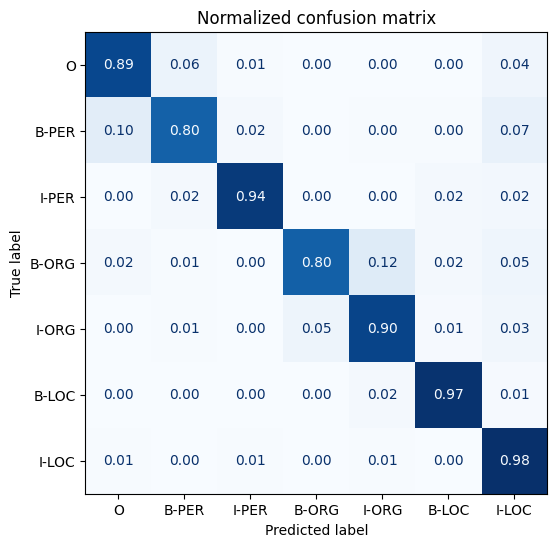

In [57]:
plot_confusion_matrix(df_tokens["predicted_label"], df_tokens["labels"], tags.names)

In [68]:
def get_f1_score(trainer, dataset):
  return trainer.predict(dataset).metrics["test_f1"]

def evaluate_lang_performance(lang, trainer):
  panx_ds = encode_panx_dataset(panx_ch[lang], xlmr_tokenizer)
  return get_f1_score(trainer, panx_ds["test"])

In [64]:
f1_scores = defaultdict(dict)
f1_scores["ta"]["ta"] = get_f1_score(trainer, panx_ta_encoded["test"])

In [65]:
f1_scores["ta"]["ta"]

0.8200890019071838

In [63]:
text = "அருண் இந்தியன் ஓயில்கார்ப்பரேஷனில் வேலை செய்கிறார்"
tag_text(text, tags, xlmr_model, xlmr_tokenizer)

0      1      2        3      4   5     6     7    8   9  10    11  \
Tokens  <s>   ▁அரு     ண்  ▁இந்திய     ன்  ▁ஓ  யில்  கார்  ப்ப  ரே  ஷ  னில்   
Tags      O  B-PER  B-PER    I-PER  I-PER   O     O     O    O   O  O     O   

           12        13   14    15  
Tokens  ▁வேலை  ▁செய்கிற  ார்  </s>  
Tags        O         O    O     O

In [69]:
f1_scores["ta"]["hi"] = evaluate_lang_performance("hi", trainer)

Map:   0%|          | 0/1145 [00:00<?, ? examples/s]

Map:   0%|          | 0/229 [00:00<?, ? examples/s]

Map:   0%|          | 0/229 [00:00<?, ? examples/s]

In [70]:
f1_scores["ta"]["hi"]

0.6839378238341969

In [71]:
panx_hi_encoded = encode_panx_dataset(panx_ch["hi"], xlmr_tokenizer)

Map:   0%|          | 0/1145 [00:00<?, ? examples/s]

In [73]:
from datasets import concatenate_datasets

def concatenate_splits(corpora):
  multi_corpus = DatasetDict()
  for split in corpora[0].keys():
    multi_corpus[split] = concatenate_datasets([corpus[split] for corpus in corpora]).shuffle(seed = 0)
  return multi_corpus

panx_ta_hi_encoded = concatenate_splits([panx_ta_encoded, panx_hi_encoded])

In [74]:
training_args.logging_steps = len(panx_ta_hi_encoded["train"]) // batch_size
training_args.push_to_hub = True
training_args.output_dir = "xlm-roberta-base-fintuned-panx-tamil-hindi"

In [80]:
from huggingface_hub import login
login("XXXXXXXXX") # hugging face api key

In [81]:
trainer = Trainer(model=xlmr_model, args = training_args, data_collator=data_collator,
                  compute_metrics = compute_metrics, tokenizer = xlmr_tokenizer, train_dataset = panx_ta_hi_encoded["train"],
                  eval_dataset = panx_ta_hi_encoded["validation"])

<ipython-input-81-4db166850b85>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=xlmr_model, args = training_args, data_collator=data_collator,


In [82]:
trainer.train()

TrainOutput(global_step=1323, training_loss=0.12965581494574283, metrics={'train_runtime': 438.1925, 'train_samples_per_second': 72.434, 'train_steps_per_second': 3.019, 'total_flos': 693647678231376.0, 'train_loss': 0.12965581494574283, 'epoch': 3.0})

In [83]:
trainer.push_to_hub(commit_message = "Training complete for Tamil and Hindi language")

CommitInfo(commit_url='https://huggingface.co/Lokeshwaran/xlm-roberta-base-fintuned-panx-ta-hi/commit/e16bf7ef2d68f0bf1f454479ab64277d3df6d2b3', commit_message='Training complete for Tamil and Hindi language', commit_description='', oid='e16bf7ef2d68f0bf1f454479ab64277d3df6d2b3', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Lokeshwaran/xlm-roberta-base-fintuned-panx-ta-hi', endpoint='https://huggingface.co', repo_type='model', repo_id='Lokeshwaran/xlm-roberta-base-fintuned-panx-ta-hi'), pr_revision=None, pr_num=None)

In [87]:
for lang in langs:
  f1 = evaluate_lang_performance(lang, trainer)
  f1_scores["ta"][lang] = f1
  print(f"F1 score for {lang} is {f1}")

F1 score for ta is 0.8349267049075845


F1 score for hi is 0.8515205724508049


Map:   0%|          | 0/1680 [00:00<?, ? examples/s]

Map:   0%|          | 0/84 [00:00<?, ? examples/s]

Map:   0%|          | 0/84 [00:00<?, ? examples/s]

F1 score for ur is 0.39593908629441626


Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/59 [00:00<?, ? examples/s]

Map:   0%|          | 0/59 [00:00<?, ? examples/s]

F1 score for ml is 0.7976190476190477
